**IMPORTING REQUIRED LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import os, sys
import re
import operator
from sklearn.model_selection import train_test_split
from collections import OrderedDict 
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB

**EXTRACTING DATA**


In [2]:
# extracting all data from tar file (20_newsgroups.tar.gz) to a folder (Documents_data)
#import tarfile
#my_tar = tarfile.open('20_newsgroups.tar.gz')
#my_tar.extractall('./Documents_data') # specify which folder to extract to
#my_tar.close()

**COLLECTING DATA IN  'X'  AND  'Y'  FORM**

In [3]:
X  =[] 
Y = []
for category in os.listdir("Documents_data/20_newsgroups"):
    for document in os.listdir("Documents_data/20_newsgroups/"+category):
        with open("Documents_data/20_newsgroups/"+category+'/'+document, "r") as f:
            X.append(f.read())
            Y.append(category)

**ADDING STOP WORDS**


In [4]:
stop_words = [
"a", "about", "above", "across", "after", "afterwards", 
"again", "all", "almost", "alone", "along", "already", "also",    
"although", "always", "am", "among", "amongst", "amoungst", "amount", "an",
"and", "another", "any", "anyhow", "anyone", "anything", "anyway", "anywhere", "are", "as", 
"at", "be", "became", "because", "become","becomes", "becoming", "been", "before", "behind", 
"being", "beside", "besides", "between", "beyond", "both", "but", "by","can", "cannot", "cant", 
"could", "couldnt", "de", "describe", "do", "done", "each", "eg", "either", "else", "enough", "etc", 
"even", "ever", "every", "everyone", "everything", "everywhere", "except", "few", "find","for","found",
"four", "from", "further", "get", "give", "go", "had", "has", "hasnt", "have", "he", "hence", "her", "here", 
"hereafter", "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his", "how", "however", "i", 
"ie", "if", "in", "indeed", "is", "it", "its", "itself", "keep", "least", "less", "ltd", "made", "many", "may", 
"me", "meanwhile", "might", "mine", "more", "moreover", "most", "mostly", "much", "must", "my", "myself", "name", 
"namely", "neither", "never", "nevertheless", "next","no", "nobody", "none", "noone", "nor", "not", "nothing", "now",
"nowhere", "of", "off", "often", "on", "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our", "ours",
"ourselves", "out", "over", "own", "part","perhaps", "please", "put", "rather", "re", "same", "see", "seem", "seemed", 
"seeming", "seems", "she", "should","since", "sincere","so", "some", "somehow", "someone", "something", "sometime", 
"sometimes", "somewhere", "still", "such", "take","than", "that", "the", "their", "them", "themselves", "then",
"thence", "there", "thereafter", "thereby", "therefore", "therein", "thereupon", "these", "they",
"this", "those", "though", "through", "throughout", "thru", "thus", "to", "together", "too", "toward", "towards",
"under", "until", "up", "upon", "us","very", "was", "we", "well", "were", "what", "whatever", "when",
"whence", "whenever", "where", "whereafter", "whereas", "whereby",
"wherein", "whereupon", "wherever", "whether", "which", "while", 
"who", "whoever", "whom", "whose", "why", "will", "with",
"within", "without", "would", "yet", "you", "your", "yours", "yourself", "yourselves"
]

**SPLITING DATA INTO TRAINING AND TASTING**


In [5]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=0)

**BUILDING VOCABULARY**

In [6]:
# Going through all the documents and within a document we are going through each word
# Building a dictionary vocab with the words and their counts
# We will not include stop words and words whose length is less than 3
'''
    \W -> Matches any non-alphanumeric character; this is equivalent to the class [^a-zA-Z0-9_].
'''
vocab = {}
for doc in x_train:
    doc= doc.lower()
    stripped=re.split(r'\W+',doc)
    for word in stripped :
        if(word.isalpha()) and (len(word)>2) and (word not in stop_words) :
            vocab[word] = vocab.get(word,0) + 1
            #print(word,end =" ")
    
print(len(vocab))

93499


**BUILDING VOCABULARY WITH TOP 2000 WORDS**

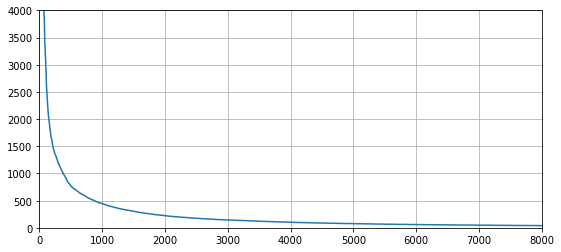

In [7]:
# We are considering only top 2000 words in our vocabulary because as we are taking more words after 2000 their frequency is 
#very less as you can see in below plot and if we create training matrix using that column corresponding 
#to this word will contain mostly zeros. So no need to add furher words bcz they will not affect our classification algorithm.

sorted_tuples = sorted(vocab.items(), key=lambda item: item[1],reverse = True)
vocab = {k: v for k, v in sorted_tuples}
df = pd.DataFrame(list(vocab.items()))
freq = df[1]
words_count = list(df.index)
plt.figure(figsize =(9, 4))
plt.axis([0,8000, 1, 4000])
plt.plot(words_count, freq)
plt.grid()
plt.show()

# final vocabulary is dictionary it will contain all top 2000 words as key and an index corresponding to each keys
final_vocab ={}
index = 0
for i , j in vocab.items() :
    final_vocab[i] = index
    index += 1
    if index == 2000 :
        break

**CREATING X_TRAIN , Y_TRAIN DATASET**


In [8]:
# creating x_train datset with 14997 rows for each document and 2000 column for each word
# doc_no will be row number and value in final_vocab dictionary will be column number
# In y train row number will be the output of corresponding row of x_train
doc_no = 0
X_train = np.full((len(x_train),2000),0)
Y_train = np.empty(len(y_train), dtype='<U30')
for doc in x_train:
    doc= doc.lower()
    stripped=re.split(r'\W+',doc)
    for word in stripped :
        if final_vocab.get(word,None) is not None :
              idx = final_vocab[word]
              X_train[doc_no][idx] += 1
    Y_train[doc_no] = y_train[doc_no]
    doc_no += 1
    
print(X_train.shape)
print(len(Y_train))

(14997, 2000)
14997


**CREATING X_TEST , Y_TEST DATASET**

In [9]:
doc_no = 0
X_test = np.full((len(x_test),2000),0)
Y_test = np.empty(len(y_test), dtype='<U30')
for doc in x_test:
    doc= doc.lower()
    stripped=re.split(r'\W+',doc)
    for word in stripped :
        if final_vocab.get(word,None) is not None :
              idx = final_vocab[word]
              X_test[doc_no][idx] += 1
    Y_test[doc_no] = y_test[doc_no]
    doc_no += 1
    
print(X_test.shape)
print(len(Y_test))

(5000, 2000)
5000


In [10]:
# This is how our data set look like
# columns numbers represent indexes corresponding to all diff 2000 words
#in dictionary
# each row number represents a document
# and the value stored at (i,j) is count of jth word in document i
df = pd.DataFrame(X_train)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,9,2,3,1,2,2,4,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,4,1,4,2,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,2,2,8,0,2,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,12,3,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,6,3,0,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


# MULTINOMIAL NAIVE BAYES ML MODEL

**STRUCTURE OF RESULT DICTIONARY**

**result**  -> total data ,  vocab_size  ,**class_1 ,  class_2 ,  class_3  ... class_n**

**class_1** -> current_class_count  ,total_count,   word1(feature1),   word2(feature2)   , ...... word2000(feature200)

"total_data" is total number of documnets.

"vocab_size" is total words present in vocabulary

"current_class_count" is total number of documents in class_1

"total_count" is count of total words in class_1

"word1(feature1)" is count of word_1 in class_1

In [11]:
# fit fnction returns a dictionary
def fit(X_train, Y_train):
    count = {}
    vocab_size = 0  # total number of words present in Vocab
    count["total_data"] = len(Y_train) # total number of documents
    class_values = set(Y_train)
    for current_class in class_values:
        count[current_class] = {}
        current_class_rows = (Y_train == current_class)
        
        # Get X_train corresponding to current_class
        X_train_current = X_train[current_class_rows]
        Y_train_current = Y_train[current_class_rows]
        
        # total no. of documents of current_class
        count[current_class]["current_class_count"] = len(Y_train_current)
        
        # Iterate over all words and store its frequency
        num_features = X_train.shape[1]
        total_current_class_words = 0
        for j in range(1, num_features + 1):
            # store frequency of j th word(feature) corresponding to current_class 
            count[current_class][j] = X_train_current[:, j-1].sum()
            total_current_class_words += X_train_current[:, j-1].sum()
            
        # store total words of a current_class also
        count[current_class]["total_count"] = total_current_class_words
        vocab_size += total_current_class_words
    count["vocab_size"] = vocab_size
    return count # returns dictionary created

In [12]:
def probability(dictionary, x, current_class):
    #  log( P(y=current_class) )
    output = np.log(dictionary[current_class]['current_class_count']) - np.log(dictionary["total_data"]) 
    
    num_features = len(dictionary[current_class].keys()) - 2  # -2 bcz 2 keys are total_count and current_class_count
    for j in range(1,num_features+1):
        xj = x[j-1]
        if xj == 0: # word not in test data document
            continue
            
        '''
            word is present as a feature. So add its corresponding logarithmic probability
            Also use laplace correction i.e
            log( P(w1|y=current_class) ) = log( count of all w1 corresponding 
                                                to current_class + 1)
                                                      -
                                            log( count of all words of current_class
                                                 + size of vocabulary)
        '''  
        count_jth_word_in_current_class = dictionary[current_class][j] + 1  # +1 bcz of laplace correction
        count_current_class = dictionary[current_class]["total_count"] + dictionary["vocab_size"]
        count_xj_probability = np.log(count_jth_word_in_current_class) - np.log(count_current_class)
        output = output + count_xj_probability
    
    return output

In [13]:
def predictSinglePoint(dictionary, x):
    classes = dictionary.keys()
    best_p = -1000   # Initially
    best_class = -1
    first_run = True  # Bcz best_p should be changed for the first time
    for current_class in classes:
        if current_class == "vocab_size" or current_class=="total_data":
            continue
            
        # Find logarithmic probability of current_class
        p_current_class = probability(dictionary, x, current_class)
        if (first_run or p_current_class > best_p):
            best_p = p_current_class
            best_class = current_class
        first_run = False  # bcz we done for 1st time
    return best_class

In [14]:
def predict(dictionary, X_test):
    y_pred = []
    for x in X_test:
        x_class = predictSinglePoint(dictionary, x)
        y_pred.append(x_class)
    return y_pred

## Finding predictions using our own Multionomial classifier

In [15]:
dictionary = fit(X_train, Y_train)

In [16]:
Y_pred = predict(dictionary, X_test)

In [17]:
print(confusion_matrix(Y_test, Y_pred))

[[176   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   1
   10  45]
 [  0 184   2   7   0  34   0   0   0   0   0  17   0   0   1   0   0   0
    8   0]
 [  0  23 112   9   0  76   0   0   0   0   0  18   0   0   1   0   1   0
    9   0]
 [  0   8   1 204   3   8   2   0   0   0   0  10   0   0   0   0   0   0
    4   0]
 [  0   6   1  42 152  15   2   0   0   0   0  10   1   0   0   0   1   1
    5   0]
 [  0   8   4   3   0 218   1   0   0   0   0   4   0   0   0   0   0   0
    2   0]
 [  0   1   1  18   0   1 180   3   0   0   0   6   7   0   2   0   1   0
   41   0]
 [  0   1   0   0   0   1   5 191   0   0   1   2   3   1   1   0  24   2
   37   0]
 [  4   1   0   0   0   0   1  11 165   0   0   8   0   1   0   0  25   2
   66   0]
 [  0   0   0   0   0   0   0   0   0 190  26   0   0   0   1   0   1   1
   29   0]
 [  0   0   0   0   0   0   0   0   0   0 221   0   0   0   0   0   1   0
    9   0]
 [  0   1   0   0   0   0   0   0   0   0   0 229   0   0   0   0

In [18]:
print(classification_report(Y_test, Y_pred))

                          precision    recall  f1-score   support

             alt.atheism       0.81      0.76      0.78       233
           comp.graphics       0.75      0.73      0.74       253
 comp.os.ms-windows.misc       0.93      0.45      0.61       249
comp.sys.ibm.pc.hardware       0.71      0.85      0.78       240
   comp.sys.mac.hardware       0.98      0.64      0.78       236
          comp.windows.x       0.61      0.91      0.73       240
            misc.forsale       0.94      0.69      0.80       261
               rec.autos       0.93      0.71      0.81       269
         rec.motorcycles       1.00      0.58      0.73       284
      rec.sport.baseball       0.99      0.77      0.87       248
        rec.sport.hockey       0.89      0.96      0.92       231
               sci.crypt       0.60      0.98      0.75       233
         sci.electronics       0.93      0.56      0.70       244
                 sci.med       0.98      0.67      0.80       256
         

## Using Inbuilt Multionomial Naive Bayes Classifier

In [19]:
clf = MultinomialNB()

In [20]:
clf.fit(X_train, Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [21]:
Y_pred = clf.predict(X_test)

In [22]:
print(confusion_matrix(Y_test, Y_pred))

[[195   0   0   0   0   0   0   4   1   0   0   0   0   1   0   1   0   0
    0  31]
 [  0 203  12  21   3   8   2   2   0   1   0   0   0   1   0   0   0   0
    0   0]
 [  0   8 195  19   5  14   3   1   0   0   0   0   2   1   1   0   0   0
    0   0]
 [  0   1   3 196  32   0   5   0   1   0   0   0   2   0   0   0   0   0
    0   0]
 [  0   2   0  23 205   0   5   0   0   0   0   0   1   0   0   0   0   0
    0   0]
 [  0  17  18  14   9 169   3   0   2   1   0   1   3   1   2   0   0   0
    0   0]
 [  0   0   0   7   3   0 237   5   1   0   1   0   5   0   1   0   1   0
    0   0]
 [  0   0   0   1   1   0  11 247   3   1   1   0   4   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   2   4 277   1   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   2   4   2 227  12   0   0   0   1   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   2   7 221   0   0   0   1   0   0   0
    0   0]
 [  0   3   0   0   0   2   1   0   0   0   0 224   2   1   0   0

In [23]:
print(classification_report(Y_test, Y_pred))

                          precision    recall  f1-score   support

             alt.atheism       0.81      0.84      0.82       233
           comp.graphics       0.84      0.80      0.82       253
 comp.os.ms-windows.misc       0.86      0.78      0.82       249
comp.sys.ibm.pc.hardware       0.66      0.82      0.73       240
   comp.sys.mac.hardware       0.76      0.87      0.81       236
          comp.windows.x       0.87      0.70      0.78       240
            misc.forsale       0.85      0.91      0.88       261
               rec.autos       0.88      0.92      0.90       269
         rec.motorcycles       0.91      0.98      0.94       284
      rec.sport.baseball       0.92      0.92      0.92       248
        rec.sport.hockey       0.93      0.96      0.94       231
               sci.crypt       0.96      0.96      0.96       233
         sci.electronics       0.89      0.88      0.88       244
                 sci.med       0.94      0.86      0.89       256
         

## Comparison between inbuilt and our own builtN classifier


**From above results we see that inbuilt Multinomial naive bayes has acuuracy of 86%**


**Where as accuracy achieved using our own Multinomial classifier is 75%**